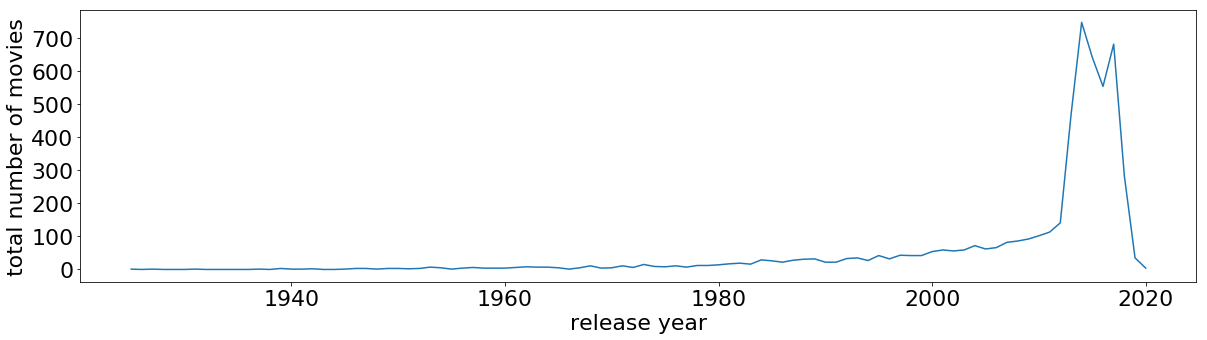

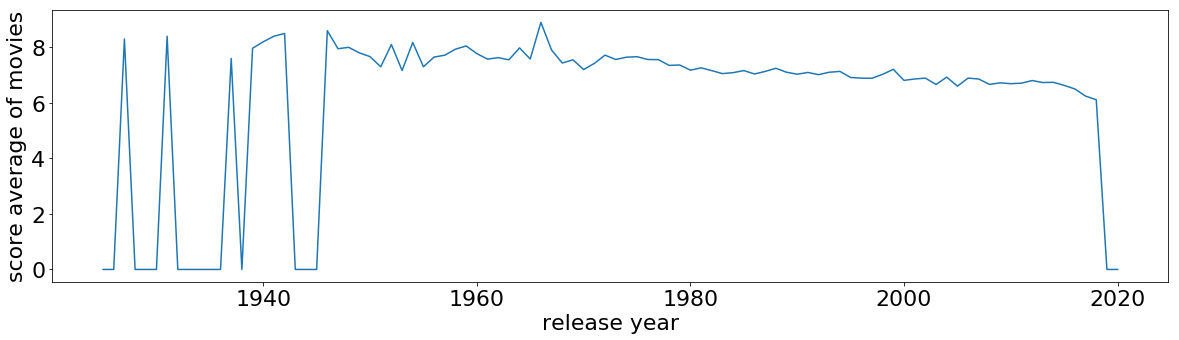

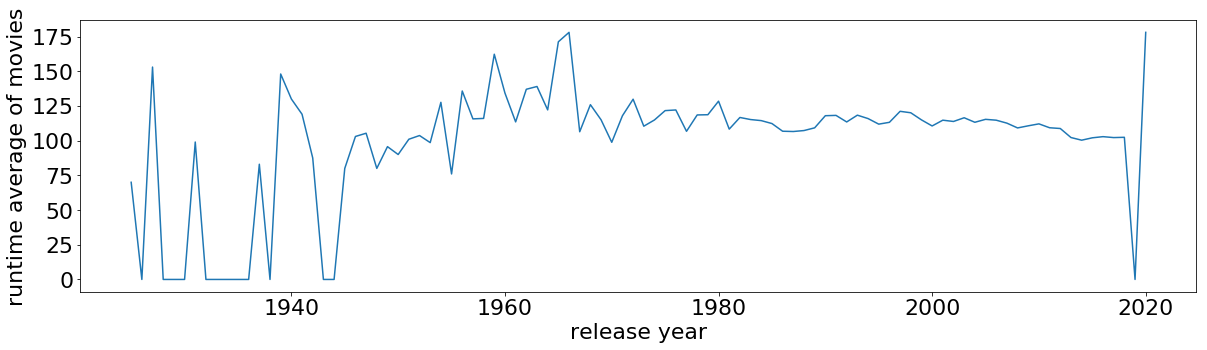

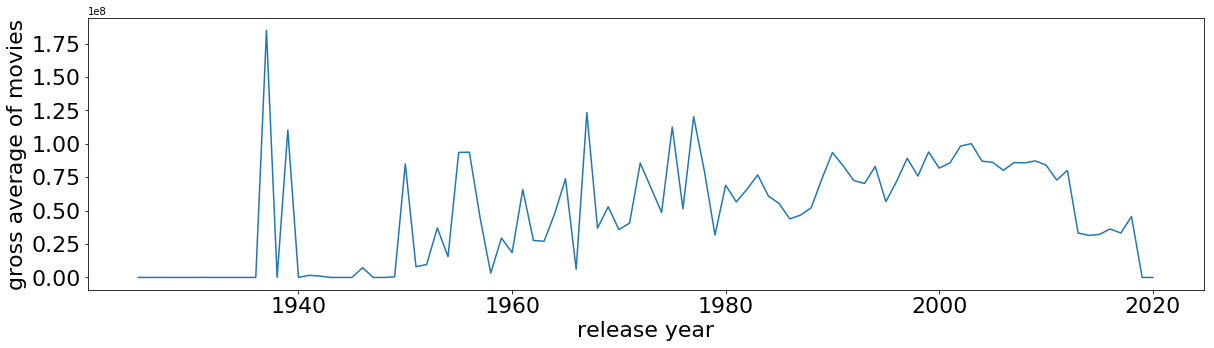

Total sample number = 2422
training sample number = 1817
testing sample number = 605

**************
** Training **
**************

0. DecisionTreeClassifier
best_param = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
- Precision(P) = 1659/1750 = 0.948000
- Recall(R) = 1659/1712 = 0.969042
- F1 = 0.958406

1. RandomForestClassifier
best_param = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score

In [2]:
import math
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn import linear_model, svm, tree, ensemble, datasets
from sklearn.model_selection import cross_val_predict, GridSearchCV
import pandas as pd
import graphviz 
import random

func_list = [tree.DecisionTreeClassifier, \
             ensemble.RandomForestClassifier, \
             svm.SVC]

func_param = [{'max_depth':9}, \
              {}, \
              {'kernel':'rbf', 'C':2, 'gamma': 0.1}]

def genData():
    
    df = pd.read_csv('merge_table.csv') 
    
    ############################################################
    
    year_min = df["movie_year"].min()
    year_max = df["movie_year"].max()
    
    movie_no_per_year = dict([])
    for year in range(year_max-year_min+1):
        movie_no_per_year[year+year_min] = 0
    
    for year in df["movie_year"]:
        movie_no_per_year[year] = movie_no_per_year[year] + 1

    lists = sorted(movie_no_per_year.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.xlabel('release year', fontsize=22)
    plt.ylabel('total number of movies', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.show()
    plt.figure(figsize=(20,5))
    
    ############################################################
    
    movie_no_per_year = dict([])
    movie_score_sum_per_year = dict([])
    for year in range(year_max-year_min+1):
        movie_no_per_year[year+year_min] = 0
        movie_score_sum_per_year[year+year_min] = 0
 
    for movie in df.values:
        if not math.isnan(movie[6]):
            movie_no_per_year[movie[2]] = movie_no_per_year[movie[2]] + 1
            movie_score_sum_per_year[movie[2]] = movie_score_sum_per_year[movie[2]] + movie[6]

    movie_score_avg_per_year = dict([])
    for year_oft in range(year_max-year_min+1):
        year = year_min + year_oft
        if movie_no_per_year[year] != 0:
            movie_score_avg_per_year[year] = float(movie_score_sum_per_year[year])/movie_no_per_year[year]
        else:
            movie_score_avg_per_year[year] = 0
            
    lists = sorted(movie_score_avg_per_year.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.xlabel('release year', fontsize=22)
    plt.ylabel('score average of movies', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.show()
    plt.figure(figsize=(20,5))
    
    ############################################################
    
    movie_no_per_year = dict([])
    movie_runtime_sum_per_year = dict([])
    for year in range(year_max-year_min+1):
        movie_no_per_year[year+year_min] = 0
        movie_runtime_sum_per_year[year+year_min] = 0

    for movie in df.values:
        tmp_str = str(movie[4])
        if tmp_str != "nan":
            movie_no_per_year[movie[2]] = movie_no_per_year[movie[2]] + 1
            movie_runtime_sum_per_year[movie[2]] = movie_runtime_sum_per_year[movie[2]] + float(movie[4].split(' ')[0])

    movie_runtime_avg_per_year = dict([])
    for year_oft in range(year_max-year_min+1):
        year = year_min + year_oft
        if movie_no_per_year[year] != 0:
            movie_runtime_avg_per_year[year] = float(movie_runtime_sum_per_year[year])/movie_no_per_year[year]
        else:
            movie_runtime_avg_per_year[year] = 0
            
    lists = sorted(movie_runtime_avg_per_year.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.xlabel('release year', fontsize=22)
    plt.ylabel('runtime average of movies', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    #plt.title('My First Plot')
    plt.show()
    plt.figure(figsize=(20,5))
    
    ############################################################
    movie_no_per_year = dict([])
    movie_gross_sum_per_year = dict([])
    for year in range(year_max-year_min+1):
        movie_no_per_year[year+year_min] = 0
        movie_gross_sum_per_year[year+year_min] = 0
        
    for movie in df.values:
        tmp_str = str(movie[7])
        if tmp_str != "nan":
            movie_no_per_year[movie[2]] = movie_no_per_year[movie[2]] + 1
            gross = movie[7].split('$')[1]
            gross = gross.replace(',', '')
            if gross[-1] == 'M':
                gross_val = float(gross[0:-1]) * (10**6)
            else:
                gross_val = float(gross[0:-1])  
            movie_gross_sum_per_year[movie[2]] = movie_gross_sum_per_year[movie[2]] + gross_val   

    movie_gross_avg_per_year = dict([])
    for year_oft in range(year_max-year_min+1):
        year = year_min + year_oft
        if movie_no_per_year[year] != 0:
            movie_gross_avg_per_year[year] = float(movie_gross_sum_per_year[year])/movie_no_per_year[year]
        else:
            movie_gross_avg_per_year[year] = 0
            
    lists = sorted(movie_gross_avg_per_year.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.xlabel('release year', fontsize=22)
    plt.ylabel('gross average of movies', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.show()
    plt.figure(figsize=(20,5))
    
    ############################################################
    new_movie_list = []
    for movie in df.values:
        tmp_str = str(movie[4])
        tmp_str2 = str(movie[7])  
        new_movie = []
        if (not math.isnan(movie[6])) and (tmp_str != "nan") and (tmp_str2 != "nan"):
            new_movie.append(movie[4].split(' ')[0])
            new_movie.append(movie[6])
            
            gross = movie[7].split('$')[1]
            gross = gross.replace(',', '')
            if gross[-1] == 'M':
                gross_val = float(gross[0:-1]) * (10**6)
            else:
                gross_val = float(gross[0:-1])
            new_movie.append(gross_val)

            if movie[2] >= 1980:
                new_movie.append(1)
            else:
                new_movie.append(0)  
  
            new_movie_list.append(new_movie)
   
    random.shuffle(new_movie_list)

    movie_features = []
    movie_label = []
    for movie in new_movie_list:
        movie_features.append(movie[0:3])
        movie_label.append(movie[3])
   
    train_no = int(round(len(movie_features) * 0.75))
    test_no = len(movie_features) - train_no
    print("Total sample number = {}".format(len(movie_features)))
    print("training sample number = {}".format(train_no))
    print("testing sample number = {}".format(test_no))

    X_train = movie_features[1:train_no+1]
    Y_train = movie_label[1:train_no+1]

    X_test = movie_features[train_no:]
    Y_test = movie_label[train_no:]
    
    return X_train, Y_train, X_test, Y_test
  
def training(X, Y, cv_type):
    best_F1 = 0;
    best_classifier = []
    best_idx = None

    for idx in [0, 1, 2]:
        l = func_list[idx]
        print("{}. {}".format(idx, l.__name__))
        
        if cv_type == 0:
            # Without Cross-Validation
            classifier = l()
            classifier.fit(X, Y)
            Y_pred = classifier.predict(X)
        elif cv_type == 1:
            # With Cross-Validation
            classifier = l(**func_param[idx])
            Y_pred = cross_val_predict(classifier, X, Y, cv=5)
            classifier.fit(X, Y)

        print("best_param = {}".format(classifier))
        F1 = calPR(Y, Y_pred)
        
        if F1 > best_F1:
            best_F1 = F1
            best_classifier = classifier
            best_idx = idx

    return best_classifier, best_idx

def calPR(Y, Y_pred):
    true_pred_num = 0
    total_pos_label_num = 0
    pred_pos_label_num = 0
    for i in range(len(Y)):
        if Y_pred[i] >= 0.5:
            Y_pred[i] = 1
        else:
            Y_pred[i] = 0

        if Y[i] == 1 and Y_pred[i] == 1:
            true_pred_num = true_pred_num + 1
        if Y[i] == 1:
            total_pos_label_num = total_pos_label_num + 1
        if Y_pred[i] == 1:
            pred_pos_label_num = pred_pos_label_num + 1

    assert (true_pred_num > 0),"true_pred_num = 0!"
    assert (pred_pos_label_num > 0),"pred_pos_label_num = 0!"
    P = float(true_pred_num)/pred_pos_label_num
    assert (total_pos_label_num > 0),"total_pos_label_num = 0!"
    R = float(true_pred_num)/total_pos_label_num
    F1 = (2 * P * R)/(P + R)
    
    print("- Precision(P) = {}/{} = {:.6f}".format(true_pred_num, pred_pos_label_num, P)) 
    print("- Recall(R) = {}/{} = {:.6f}".format(true_pred_num, total_pos_label_num, R)) 
    print("- F1 = {:.6f}\n".format(F1))
    
    return F1

def testing(X_test, Y_test, best_classifier):
    Y_pred = best_classifier.predict(X_test)
    calPR(Y_test, Y_pred)
    
if __name__ == "__main__":
    
    X_train, Y_train, X_test, Y_test = genData()
  
    print("=======================================")

    cv_type = 1

    # Training
    print("\n**************")
    print("** Training **")
    print("**************\n")

    best_classifier, best_idx = training(X_train, Y_train, cv_type)

    print("=======================================")
 
    # Testing
    print("\n**************")
    print("** Testing **")
    print("**************\n")

    print(best_classifier)
    testing(X_test, Y_test, best_classifier)